In [1]:
import pandas as pd
data = pd.read_csv("data/file.csv", encoding='latin-1')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_6916\293913506.py:2: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/file.csv", encoding='latin-1')


In [49]:
datas = data[data["Unit_x"] == "hg/ha"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item_x"] == "Rice"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas[datas["Item_y"] == "Pesticides (total)"]
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Element_y", axis=1)
datas = datas.drop("Element_x", axis=1)
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])

<Axes: xlabel='Year', ylabel='yield_amound'>

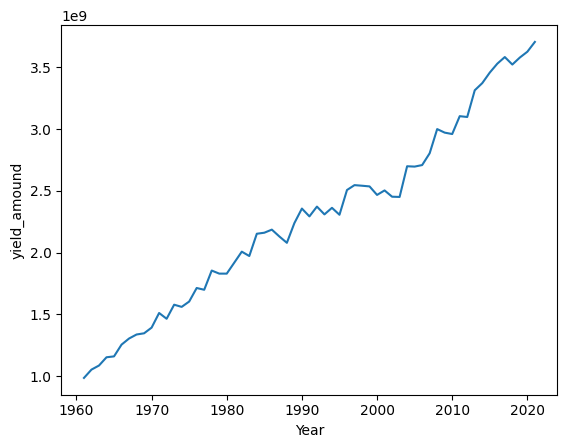

In [72]:
import seaborn as sns
a = data
#a = data[data["Area"] == "Brazil"]
a = a[a["Item_x"] == "Cereals, primary"]
a = a[a["Unit_x"] == "tonnes"]
a = a.drop_duplicates(subset=["Area", "Year"])
a = a.groupby("Year").sum()
sns.lineplot(data=a, x="Year", y="yield_amound")

In [74]:
1.2/0.2

5.999999999999999

<Axes: xlabel='Year', ylabel='yield_amound'>

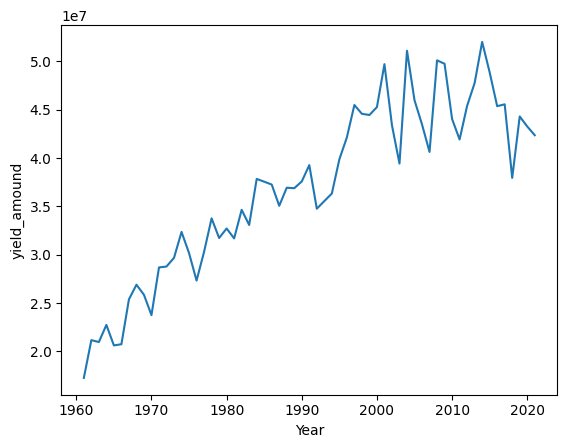

In [75]:
import seaborn as sns
a = data[data["Area"] == "Germany"]
a = a[a["Item_x"] == "Cereals, primary"]
a = a[a["Unit_x"] == "tonnes"]
a = a.drop_duplicates(subset=["Area", "Year"])
sns.lineplot(data=a, x="Year", y="yield_amound")

<Axes: xlabel='Year', ylabel='avg_temp'>

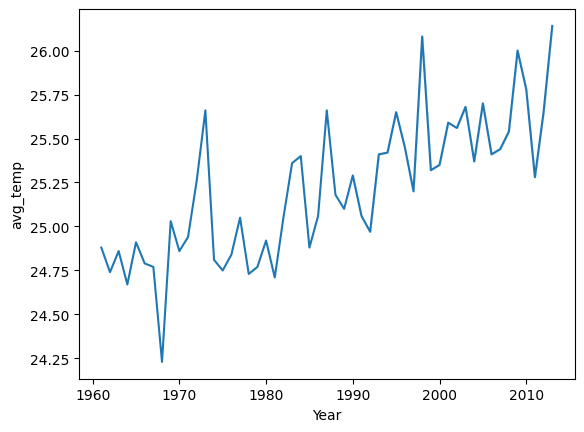

In [67]:
sns.lineplot(data = a, x = "Year", y = "avg_temp")

In [52]:
from sklearn.preprocessing import OneHotEncoder
object_columns = datas.select_dtypes(include='object').columns
yield_df_onehot = pd.get_dummies(datas, columns=object_columns, prefix = object_columns)


Linear Regression

In [53]:
yield_df_onehot = yield_df_onehot.dropna()

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
# Extract features (X) 
# target variable (y)
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 51254957.20114843


In [55]:
import seaborn as sns

<Axes: xlabel='yield_amound'>

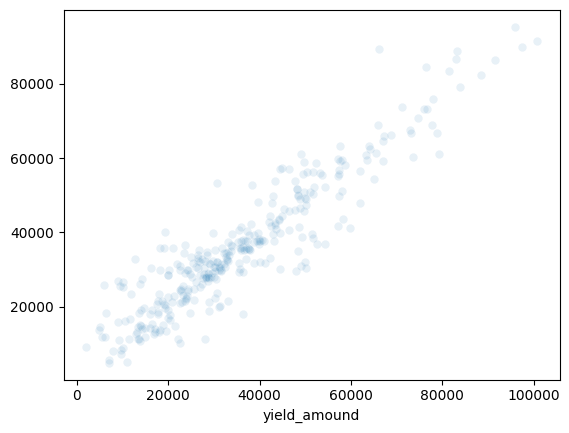

In [56]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.1)

<Axes: xlabel='yield_amound', ylabel='Count'>

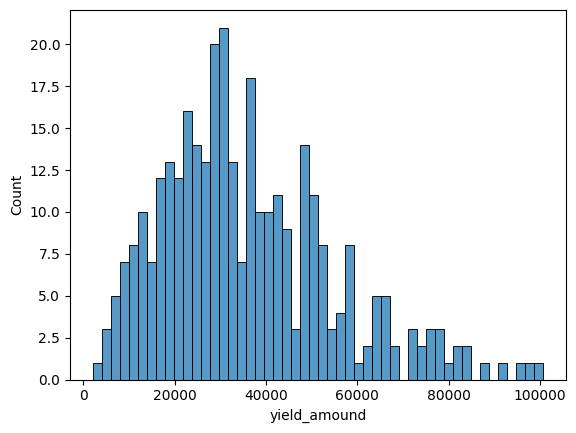

In [57]:
sns.histplot( data= y_test, bins=50)

<Axes: ylabel='Count'>

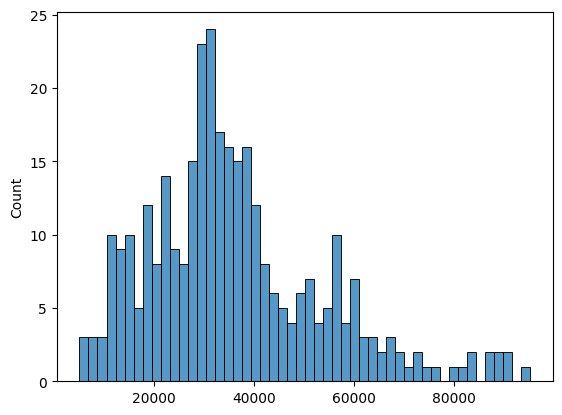

In [58]:
sns.histplot( data= y_pred, bins=50)

Lasso

In [59]:
from sklearn.linear_model import Lasso

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(alpha=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 307333054.06460243


<Axes: xlabel='yield_amound'>

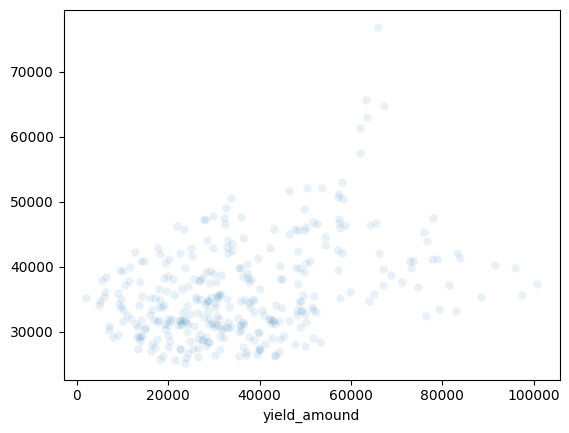

In [60]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.1)

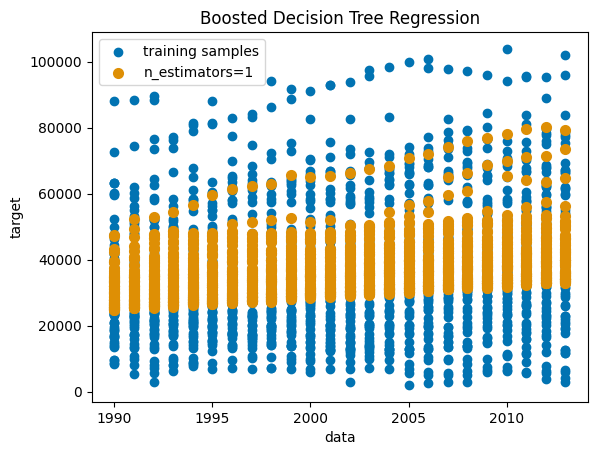

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred =  model.predict(X)
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X["Year"], y, color=colors[0], label="training samples")
plt.scatter(X["Year"], y_pred, color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

Gradiant Boosting Regressor 

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 60727222.76108579


<Axes: xlabel='yield_amound'>

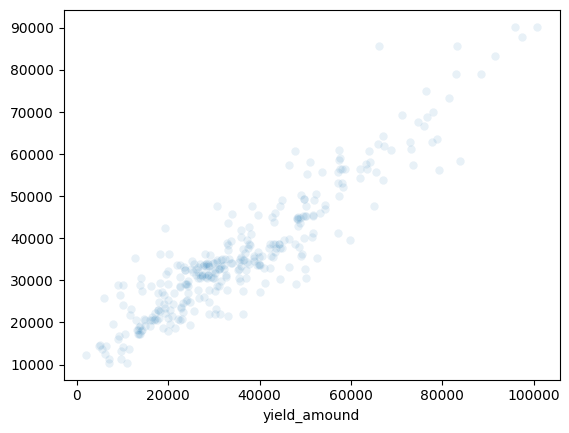

In [64]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.1)

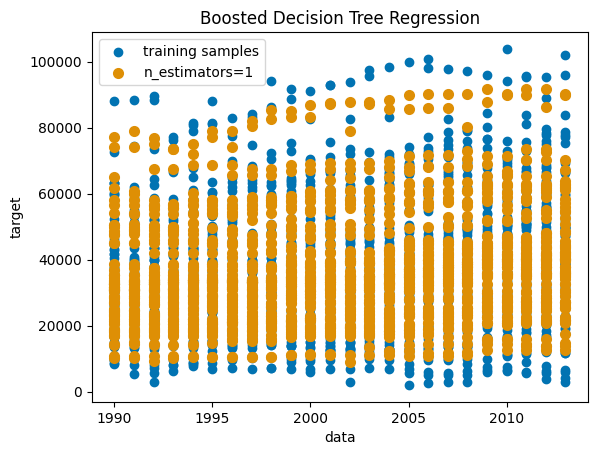

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred =  model.predict(X)
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X["Year"], y, color=colors[0], label="training samples")
plt.scatter(X["Year"], y_pred, color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

Random forest regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 29373881.293411616


<Axes: xlabel='yield_amound'>

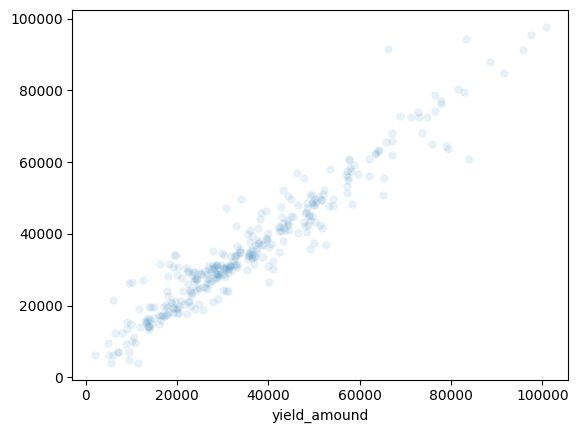

In [46]:
sns.scatterplot(x=y_test, y=y_pred, alpha= 0.1)

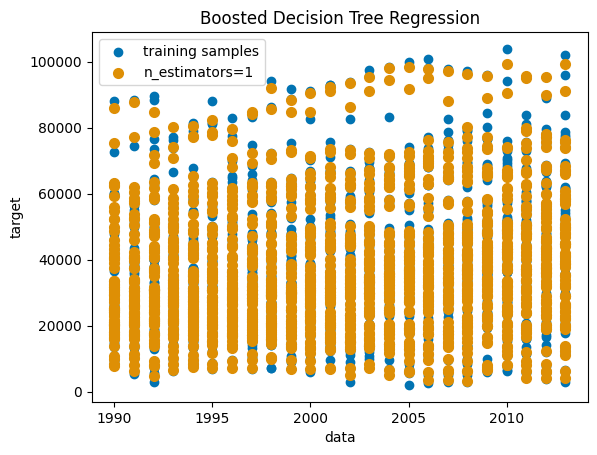

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred =  model.predict(X)
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X["Year"], y, color=colors[0], label="training samples")
plt.scatter(X["Year"], y_pred, color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [22]:
yield_df_onehot

,Year,rain,avg_temp,yield_amound,pesticide_amound,Area_Afghanistan,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Area_Ukraine,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
1201110,1990,1010.0,24.12,9512.0,64.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1201111,1990,1010.0,24.12,9512.0,56.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1201112,1990,1010.0,24.12,9512.0,30.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1201113,1990,1010.0,24.12,9512.0,17.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1201114,1990,1010.0,24.12,9512.0,5.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15381224,2013,657.0,19.76,3999.0,35.05,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
15381225,2013,657.0,19.76,3999.0,360.56,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
15381226,2013,657.0,19.76,3999.0,7.62,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
15381228,2013,657.0,19.76,3999.0,0.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [48]:
yield_china = yield_df_onehot[yield_df_onehot["Area_China"] == True]
yield_china

,Year,rain,avg_temp,yield_amound,pesticide_amound,Area_Afghanistan,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Area_Ukraine,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
1686843,1991,645.0,14.36,56369.0,154540.89,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2128379,1992,645.0,14.58,57959.0,160928.92,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2651452,1993,645.0,14.38,58462.0,169526.46,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3206197,1994,645.0,15.65,58288.0,194779.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3794487,1995,645.0,15.00,60210.0,215215.61,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4442190,1996,645.0,14.58,62050.0,225371.40,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5103249,1997,645.0,15.29,63111.0,235107.08,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5770033,1998,645.0,15.74,63529.0,241507.66,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6429229,1999,645.0,15.54,63344.0,260987.76,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041375,2000,645.0,15.26,62642.0,250607.28,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


11.5

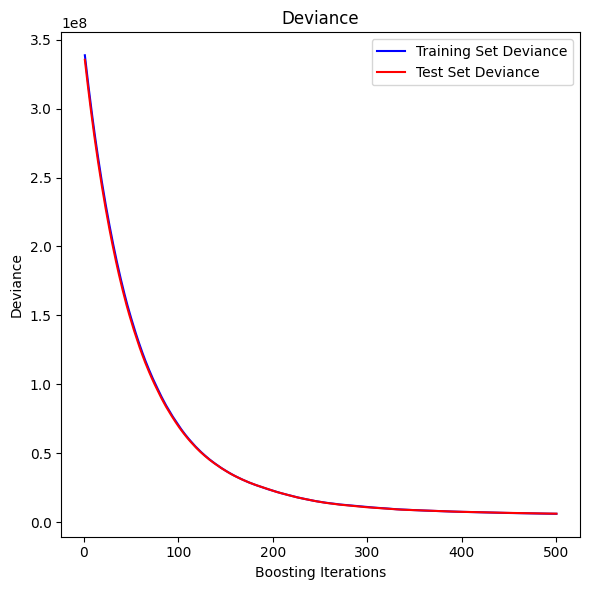

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
X = yield_df_onehot.drop("yield_amound", axis=1)
y = yield_df_onehot['yield_amound']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))

est = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.1, max_depth=5, random_state=0,
    loss='squared_error'
).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


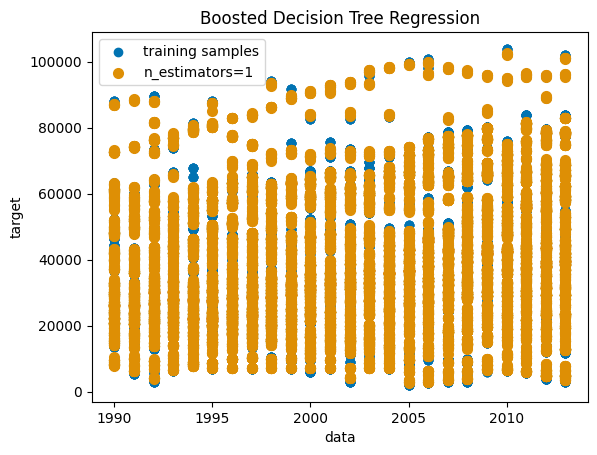

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred =  est.predict(X)
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X["Year"], y, color=colors[0], label="training samples")
plt.scatter(X["Year"], y_pred, color=colors[1], label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

<Axes: xlabel='Year', ylabel='yield_amound'>

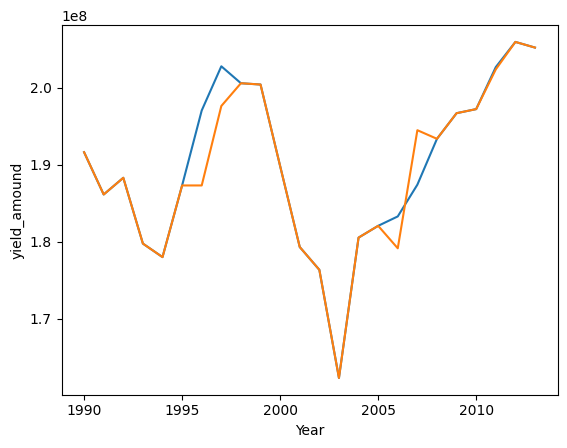

In [24]:
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(x = X["Year"], y = y, ax=ax) # first dataset
sns.lineplot(x = X["Year"], y = y_pred, ax=ax) # first dataset

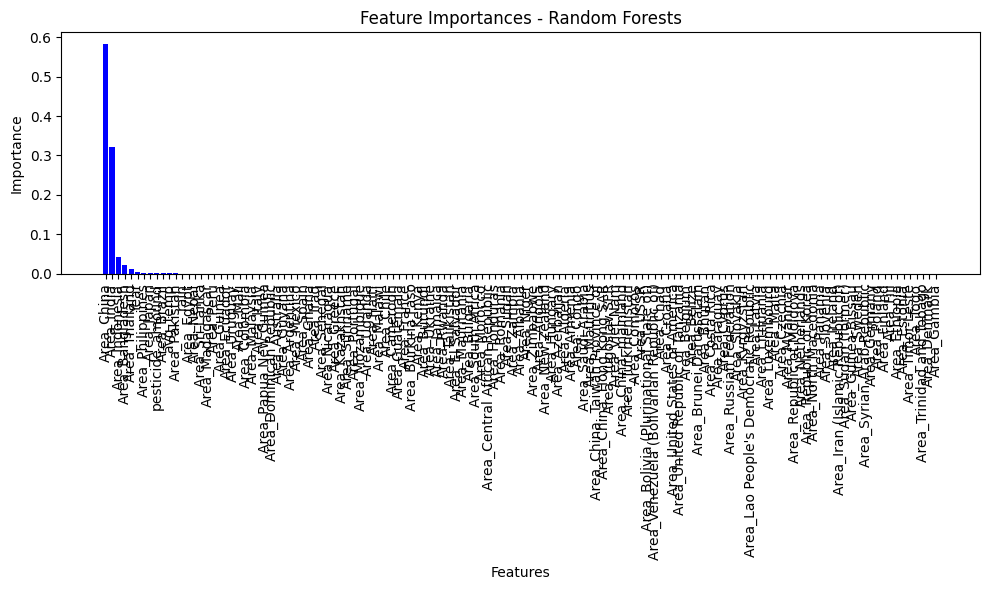

In [25]:
from sklearn.inspection import permutation_importance
# Get feature importances
importances = model.feature_importances_
# Calculate Permutation Importance on the test set
results = permutation_importance(est, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
importances_test = results.importances_mean
# Get feature names
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forests")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()


In [26]:
yield_china["avg_temp"].unique

<bound method Series.unique of 484910     15.14
645127     14.36
815543     14.58
1018407    14.38
1234015    15.65
1463030    15.00
1715057    14.58
1972048    15.29
2230729    15.74
2486856    15.54
2725237    15.26
2995425    15.26
3238659    15.82
3426675    14.67
3634023    15.71
3845198    15.04
4065673    15.87
4299170    15.82
4549512    15.10
4785825    15.30
5027725    15.18
5270057    14.83
5521140    15.02
5778552    16.86
Name: avg_temp, dtype: float64>

In [27]:
yield_df_onehot

,Year,rain,avg_temp,yield_amound,pesticide_amound,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Area_Uganda,Area_Ukraine,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
458211,1990,1010.0,24.12,3000.00,64.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
459460,1990,1485.0,16.37,7000.00,121.00,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
460752,1990,591.0,17.67,428100.00,26156.00,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
462426,1990,534.0,17.47,924000.00,17866.42,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
464438,1990,1274.0,21.15,40000.00,92.08,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967991,2013,565.0,10.33,145050.00,86781.80,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5972086,2013,1300.0,15.92,1359500.00,19028.60,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5976055,2013,495.0,14.98,3000.00,26857.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5976670,2013,1020.0,20.14,44747.00,3837.73,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


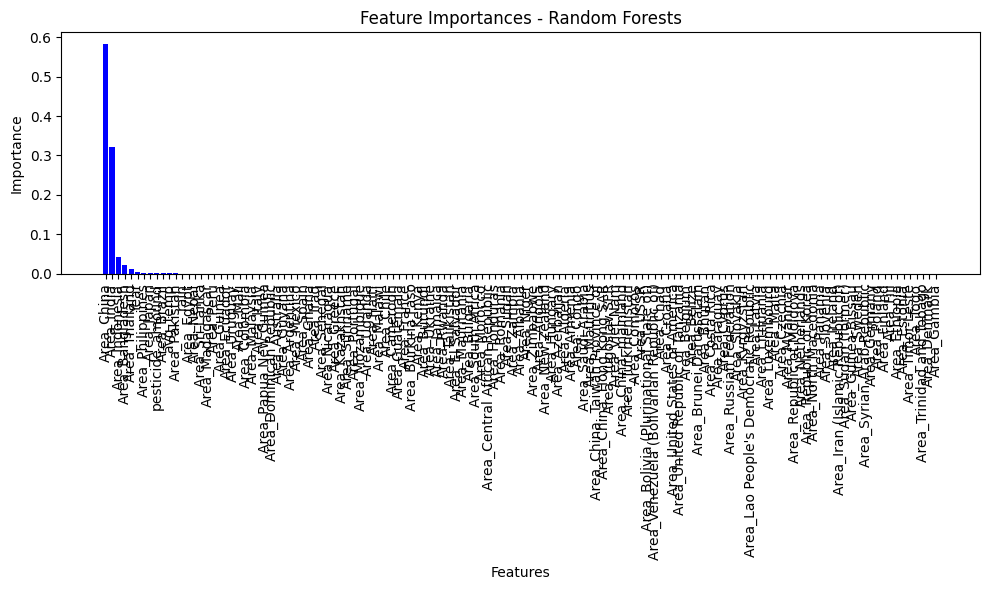

In [28]:
from sklearn.inspection import permutation_importance
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = np.array(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forests")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()